# 📊 전국 동 인프라 점수 시각화 분석

이 노트북은 `전국_동_인프라_점수.csv` 데이터를 바탕으로 지역별 인프라 현황을 시각화 분석합니다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform

# 한글 폰트 설정 (Windows 기준)
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    plt.rc('font', family='AppleGothic')
else: # Linux (Colab 등)
    plt.rc('font', family='NanumBarunGothic')

plt.rcParams['axes.unicode_minus'] = False
sns.set_theme(style="whitegrid", font="Malgun Gothic", font_scale=1.2)

# 데이터 로드
df = pd.read_csv('전국_동_인프라_점수.csv')
df.head()

,dong_code,region_name,school,subway,hospital,cafe,total_score
0,2717010900,대구광역시 서구 원대동3가,68,89,842,1189,3276
1,2717010700,대구광역시 서구 원대동1가,75,105,1119,1434,4137
2,2717010800,대구광역시 서구 원대동2가,75,87,1035,1345,3826
3,3020015200,대전광역시 유성구 둔곡동,4,76,2,25,265
4,2717010400,대구광역시 서구 상리동,44,7,126,212,573


## 1️⃣ 데이터 전처리
`region_name`에서 앞부분을 추출하여 '시도' 단위를 생성합니다.

In [2]:
# 시도 단위 추출 (공백 기준 첫 번째 단어)
df['city_province'] = df['region_name'].apply(lambda x: x.split()[0])
df.head()

,dong_code,region_name,school,subway,hospital,cafe,total_score,city_province
0,2717010900,대구광역시 서구 원대동3가,68,89,842,1189,3276,대구광역시
1,2717010700,대구광역시 서구 원대동1가,75,105,1119,1434,4137,대구광역시
2,2717010800,대구광역시 서구 원대동2가,75,87,1035,1345,3826,대구광역시
3,3020015200,대전광역시 유성구 둔곡동,4,76,2,25,265,대전광역시
4,2717010400,대구광역시 서구 상리동,44,7,126,212,573,대구광역시


## 2️⃣ 전체 total_score 상위 20개 동
전국에서 가장 인프라 점수가 높은 상위 20개 지역을 확인합니다.

C:\Users\user\AppData\Local\Temp\ipykernel_11968\1870506404.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_all, x='total_score', y='region_name', palette='viridis')


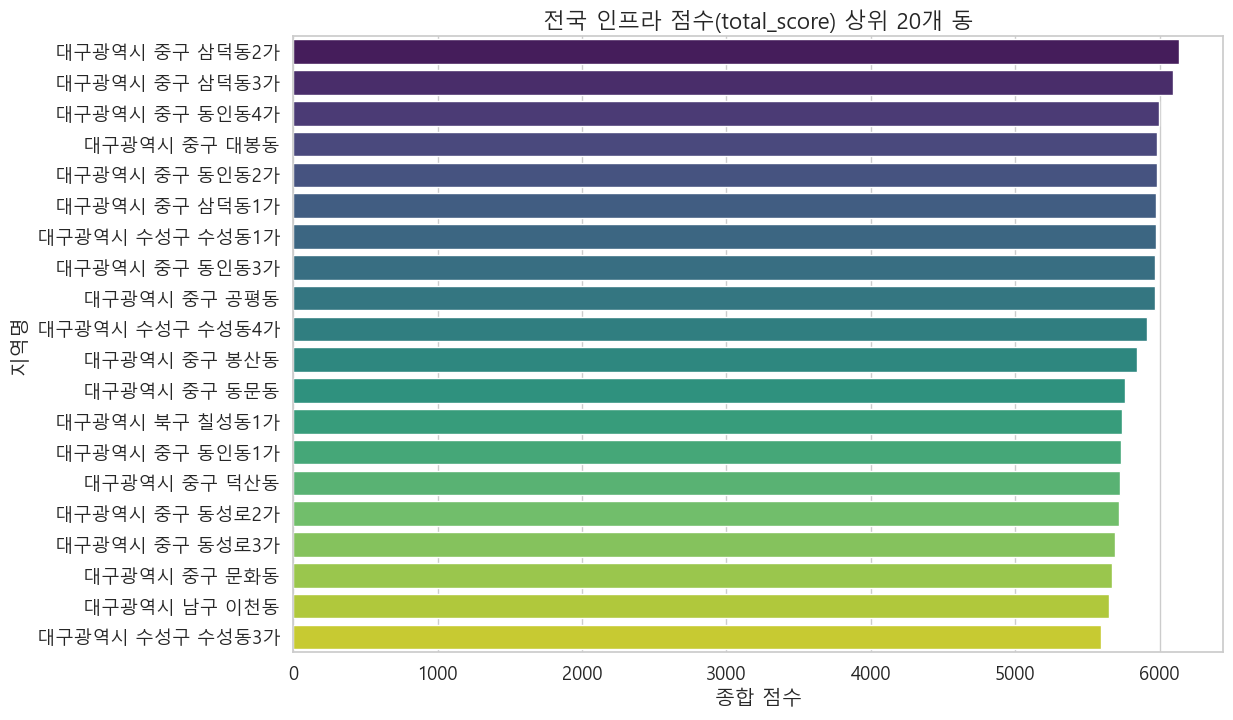

In [3]:
top_20_all = df.nlargest(20, 'total_score')

plt.figure(figsize=(12, 8))
sns.barplot(data=top_20_all, x='total_score', y='region_name', palette='viridis')
plt.title('전국 인프라 점수(total_score) 상위 20개 동', fontsize=16)
plt.xlabel('종합 점수')
plt.ylabel('지역명')
plt.show()

## 3️⃣ 주요 지역별 Top 20 동
특정 시도 내에서 인프라가 가장 우수한 상위 20개 동을 분석합니다. (예: 부산광역시, 대구광역시  등)

C:\Users\user\AppData\Local\Temp\ipykernel_11968\1510728203.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20, x='total_score', y='region_name', palette='plasma')


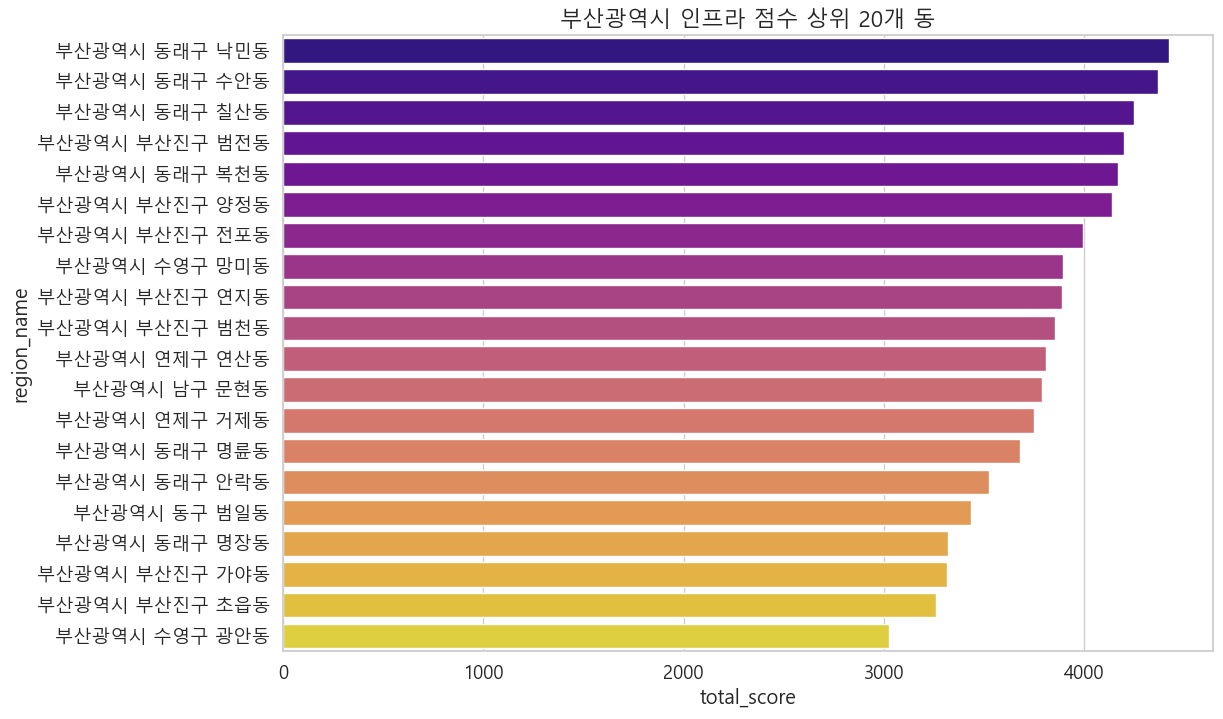

C:\Users\user\AppData\Local\Temp\ipykernel_11968\1510728203.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20, x='total_score', y='region_name', palette='plasma')


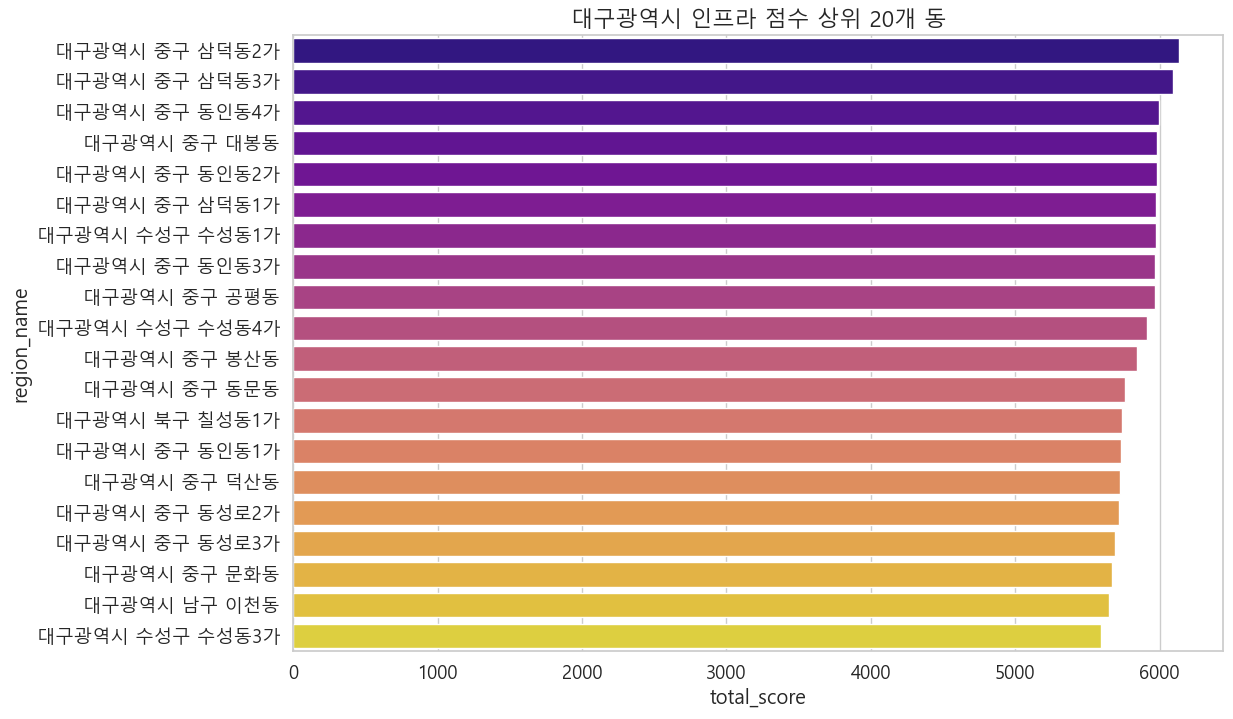

In [4]:
def plot_top_20_by_city(city_name):
    city_df = df[df['city_province'] == city_name]
    if city_df.empty:
        print(f"{city_name} 데이터가 없습니다.")
        return
    
    top_20 = city_df.nlargest(20, 'total_score')
    
    plt.figure(figsize=(12, 8))
    sns.barplot(data=top_20, x='total_score', y='region_name', palette='plasma')
    plt.title(f'{city_name} 인프라 점수 상위 20개 동', fontsize=16)
    plt.show()

# 예시: 부산광역시 상위 20개 동
plot_top_20_by_city('부산광역시')

# 예시: 대구광역시 상위 20개 동
plot_top_20_by_city('대구광역시')

## 4️⃣ 지역별 평균 인프라 점수 비교
시도별로 평균적인 인프라 수준이 어떻게 다른지 비교합니다.

C:\Users\user\AppData\Local\Temp\ipykernel_11968\532896864.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_avg, x='city_province', y='total_score', palette='magma')


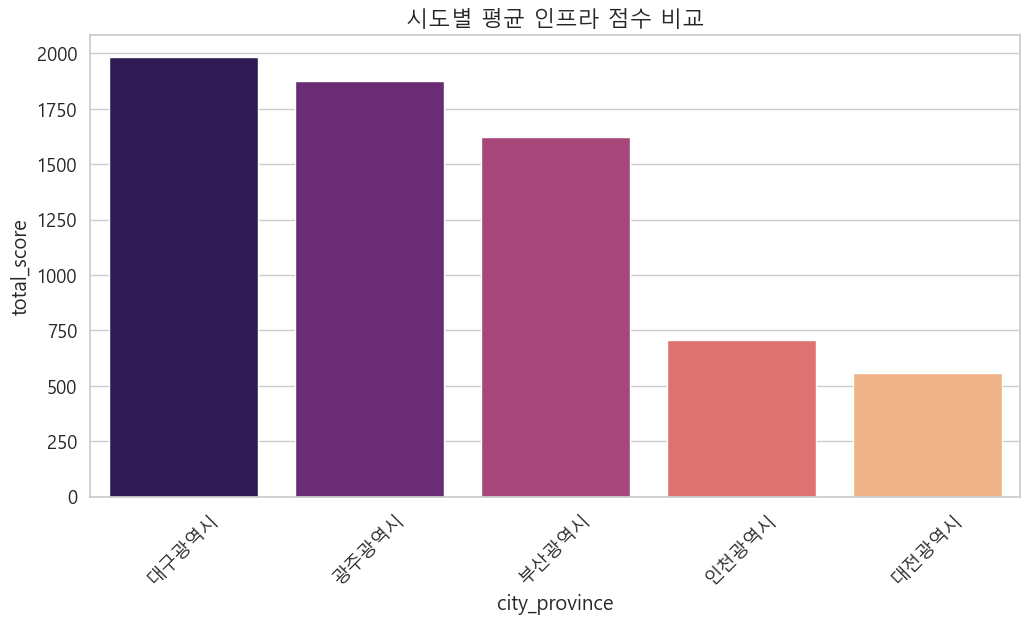

In [5]:
city_avg = df.groupby('city_province')['total_score'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=city_avg, x='city_province', y='total_score', palette='magma')
plt.title('시도별 평균 인프라 점수 비교', fontsize=16)
plt.xticks(rotation=45)
plt.show()

## 5️⃣ 인프라 지표별 분포 분석
학교, 지하철, 병원, 카페 수의 분포를 확인합니다.

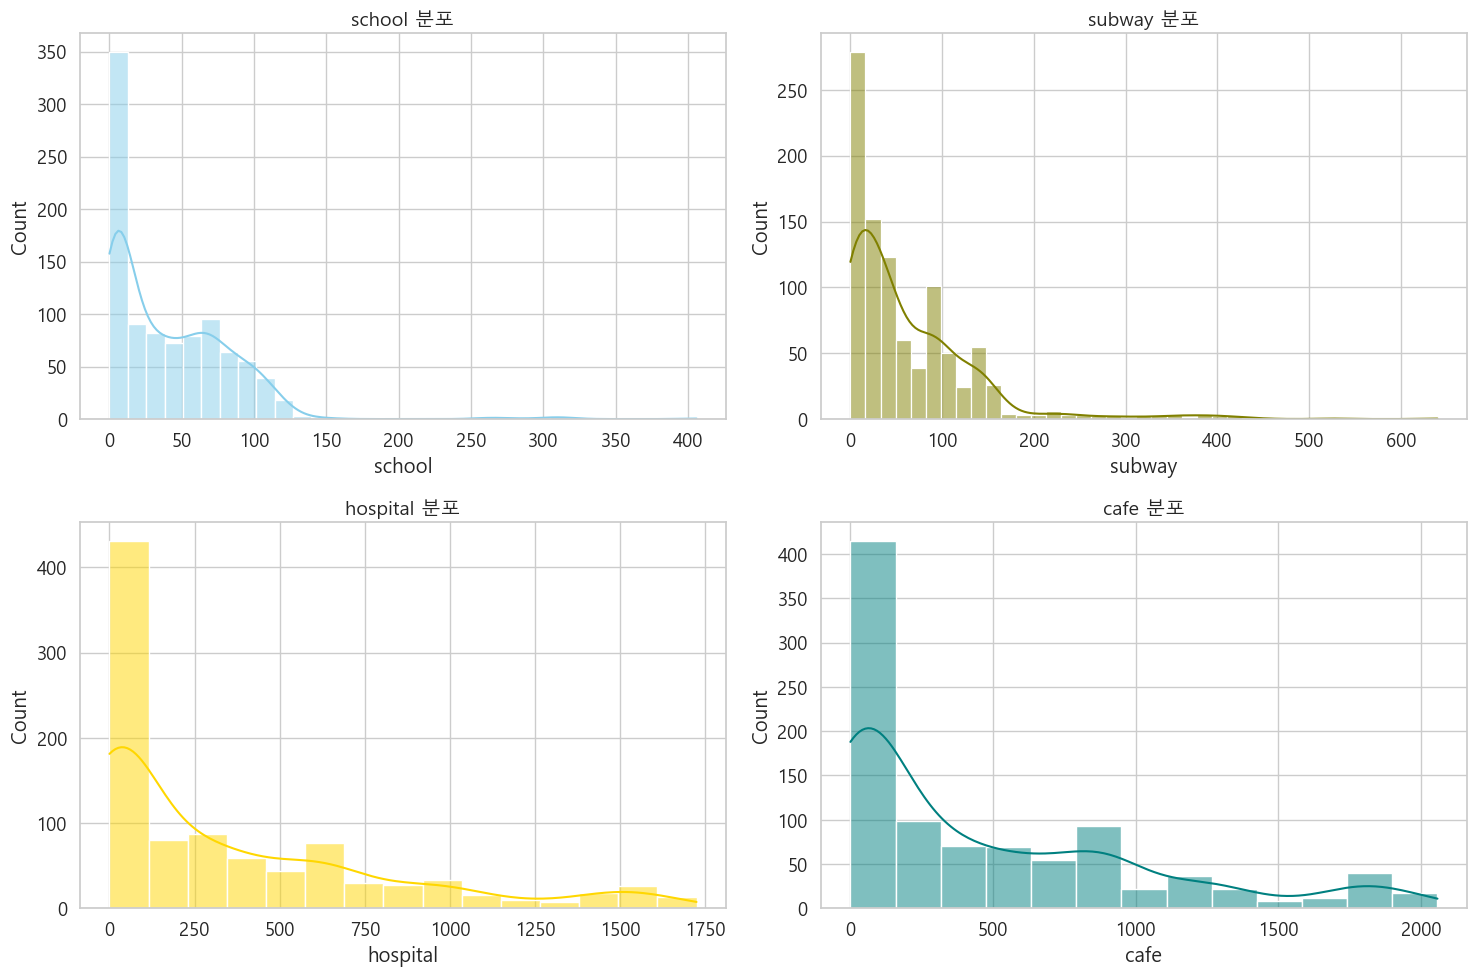

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
features = ['school', 'subway', 'hospital', 'cafe']
colors = ['skyblue', 'olive', 'gold', 'teal']

for i, feature in enumerate(features):
    ax = axes[i//2, i%2]
    sns.histplot(df[feature], kde=True, ax=ax, color=colors[i])
    ax.set_title(f'{feature} 분포', fontsize=14)

plt.tight_layout()
plt.show()

## 6️⃣ 변수 간 상관관계 분석
어떤 인프라 요소가 종합 점수에 가장 큰 영향을 미치는지 확인합니다.

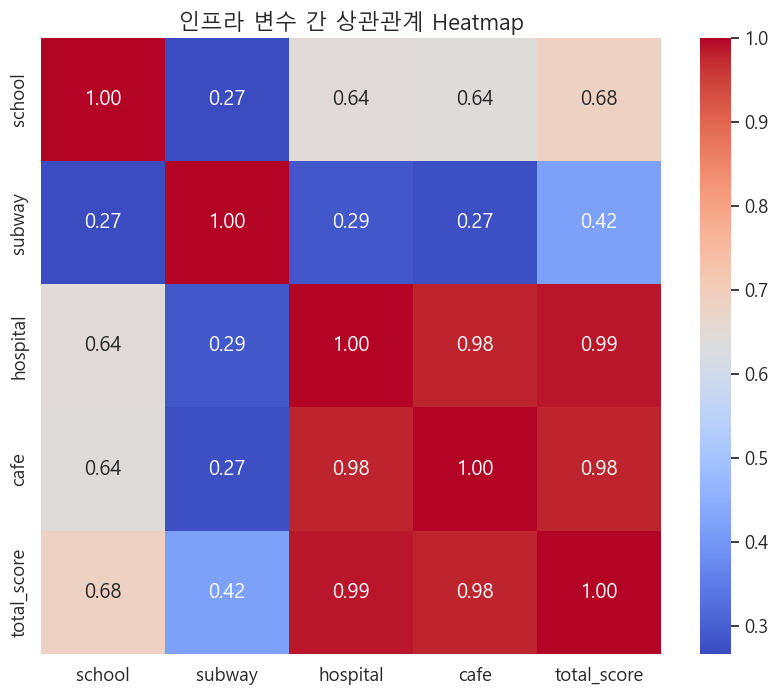

In [7]:
plt.figure(figsize=(10, 8))
correlation = df[['school', 'subway', 'hospital', 'cafe', 'total_score']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('인프라 변수 간 상관관계 Heatmap', fontsize=16)
plt.show()

## 7️⃣ 주요 변수 간 산점도
종합 점수와 카페/병원 수 사이의 관계를 시각화합니다.

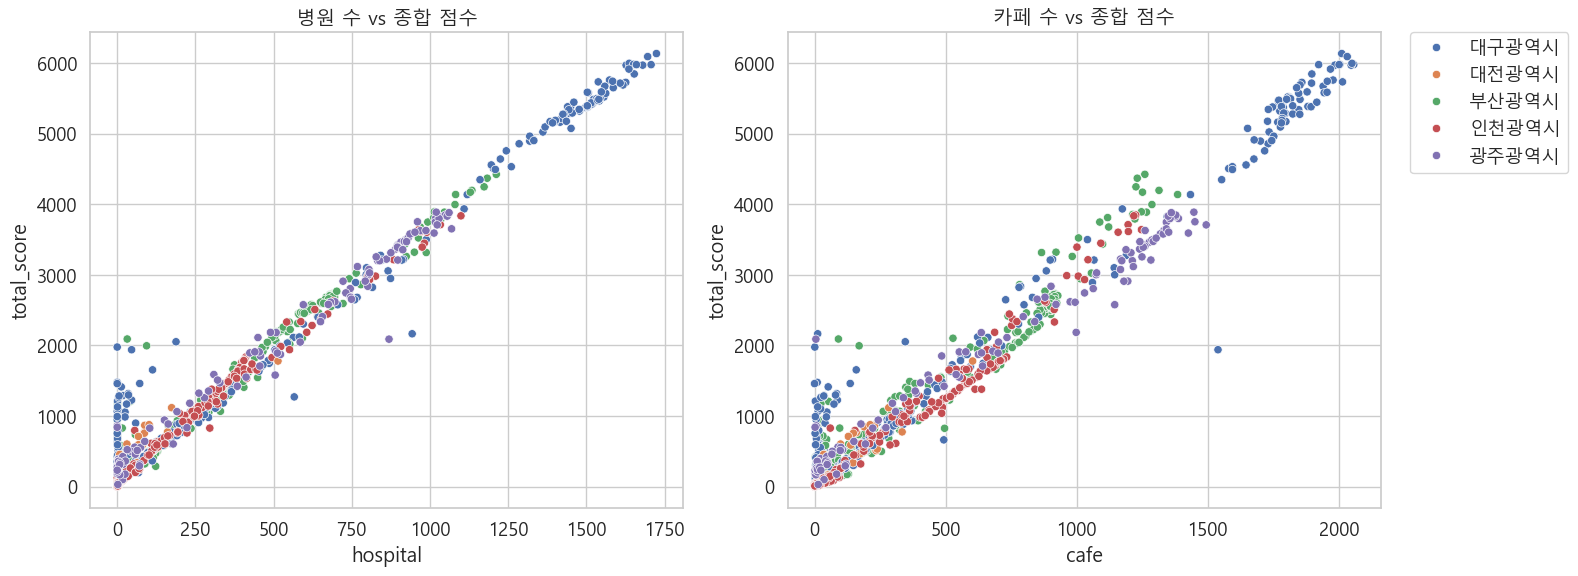

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(data=df, x='hospital', y='total_score', hue='city_province', ax=axes[0], legend=False)
axes[0].set_title('병원 수 vs 종합 점수', fontsize=14)

sns.scatterplot(data=df, x='cafe', y='total_score', hue='city_province', ax=axes[1])
axes[1].set_title('카페 수 vs 종합 점수', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.show()